# IS-02 Machine Learning - Data and Web Science
## Lecture 11: Ensembles
## Project 10
### <i>Avgitidis Konstantinos</i>

In [1]:
#import necessary libraries
from sklearn import datasets
import logging
import pickle
from time import time
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
#load the breast_cancer dataset and get X,y
X, y = datasets.load_breast_cancer(return_X_y=True,as_frame=True)

In [3]:
print(X.isna().any()) #check if we have any nan values
print(y.isna().any()) 

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [4]:
# use standard scaler and cv 10-fold for each model
try:
   df = pickle.load( open( "boost.p", "rb" ) )
except FileNotFoundError:

    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s %(message)s')

    pipe = Pipeline([('scale', StandardScaler()),("estimator", LinearRegression())])

    #Our models
    parameters = [
        {
        'estimator': [BaggingClassifier()],
        'estimator__base_estimator': [SVC()],
        'estimator__n_estimators': [10,15,20],
    },
                {
        'estimator': [BaggingClassifier()],
        'estimator__base_estimator': [DecisionTreeClassifier()],
        'estimator__n_estimators': [10,15,20],
    },
                    {
        'estimator': [AdaBoostClassifier()],
        'estimator__base_estimator': [DecisionTreeClassifier()],
        'estimator__n_estimators': [50,80,100],
        'estimator__learning_rate': [.8,1],
    },
                            {
        'estimator': [ExtraTreesClassifier()],
        'estimator__criterion': ["gini","entropy"],
        'estimator__n_estimators': [50,80,100],
    },
    ]
    scoring = ["accuracy","f1_micro","precision","recall"]
    if __name__ == "__main__":

        grid_search = GridSearchCV(pipe, parameters,scoring=scoring, n_jobs=-1, cv=10, refit = "accuracy",verbose=10)

        print("Performing grid search...")
        print("pipeline:", [name for name, _ in pipe.steps])
        t0 = time()
        grid_search.fit(X, y)
        print("done in %0.3fs" % (time() - t0))
        print()
        print("Best score: %0.3f" % grid_search.best_score_)
        df = pd.DataFrame(grid_search.cv_results_)
        pickle.dump(df, open( "boost.p", "wb" ) ) #save dataframe into a pickle file

In [5]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__base_estimator,param_estimator__n_estimators,param_estimator__learning_rate,param_estimator__criterion,params,...,split3_test_recall,split4_test_recall,split5_test_recall,split6_test_recall,split7_test_recall,split8_test_recall,split9_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.098083,0.007914,0.023752,0.007273,"BaggingClassifier(base_estimator=SVC(), n_esti...",SVC(),10,NaN,NaN,{'estimator': BaggingClassifier(base_estimator...,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.953488,0.986936,0.020879,2
1,0.133228,0.011794,0.025205,0.003012,"BaggingClassifier(base_estimator=SVC(), n_esti...",SVC(),15,NaN,NaN,{'estimator': BaggingClassifier(base_estimator...,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.953488,0.986936,0.020879,2
2,0.177468,0.015687,0.028174,0.004137,"BaggingClassifier(base_estimator=SVC(), n_esti...",SVC(),20,NaN,NaN,{'estimator': BaggingClassifier(base_estimator...,...,1.000000,1.000000,1.000000,1.00000,0.977273,1.000000,0.976744,0.984132,0.022116,7
3,0.138550,0.017545,0.014301,0.005432,BaggingClassifier(),DecisionTreeClassifier(),10,NaN,NaN,"{'estimator': BaggingClassifier(), 'estimator_...",...,1.000000,0.965517,1.000000,0.97561,0.954545,0.909091,0.906977,0.948714,0.045937,13
4,0.173704,0.016895,0.013398,0.001999,BaggingClassifier(),DecisionTreeClassifier(),15,NaN,NaN,"{'estimator': BaggingClassifier(), 'estimator_...",...,0.931034,1.000000,0.955556,0.97561,0.954545,0.954545,1.000000,0.965859,0.024808,11


In [6]:
df["param_estimator"] = df["param_estimator"].astype(str)

In [7]:
df.sort_values(by=["param_estimator","rank_test_f1_micro"],axis=0,ascending=False,inplace=True)
df.drop_duplicates(subset=["param_estimator"],keep="first",inplace=True) #keep only the best for each algorithm
models = pickle.load( open( "random_forest.p", "rb" ) ) #load exercise's 2 Random Forest models
models.sort_values(by='f1_score',axis=0,ascending=False,inplace=True)

In [8]:
#union the 2 dataframes so we end up with just one
fdf = pd.DataFrame([models[["Algorithm","f1_score","precision_score","recall_score","accuracy_score"]].values[0]],
                   columns=["Algorithm","f1_score","precision_score","recall_score","accuracy_score"])
fdf2 = pd.DataFrame(df[["param_estimator","mean_test_f1_micro","mean_test_precision","mean_test_recall","mean_test_accuracy"]].values,
                   columns=["Algorithm","f1_score","precision_score","recall_score","accuracy_score"])

df = pd.concat([fdf,fdf2],axis=0)

In [9]:
df.sort_values(by='f1_score',axis=0,inplace=True)

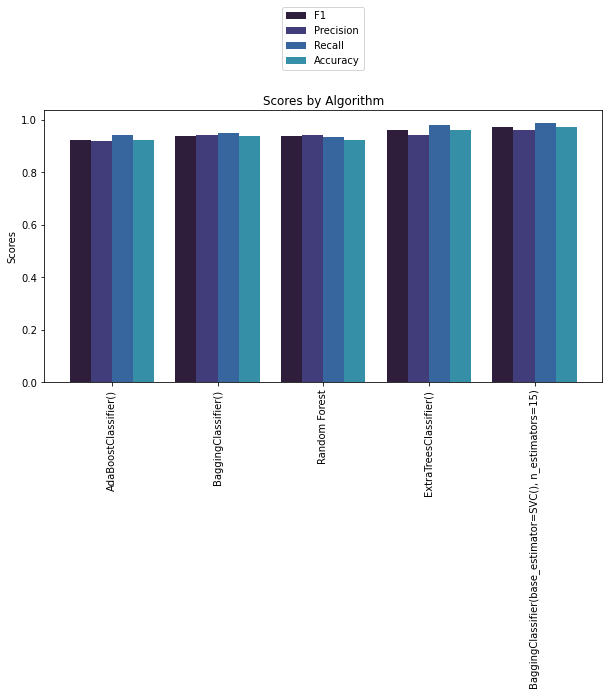

In [10]:
#plot the grouped-barplot
labels = list(df['Algorithm'])
f1_scores = list(df['f1_score'])
prec_scores = list(df['precision_score'])
rec_scores = list(df['recall_score'])
acc_scores = list(df['accuracy_score'])

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
palette = itertools.cycle(sns.color_palette("mako"))
fig, ax = plt.subplots(figsize=(10,5))
c = next(palette)
rects1 = ax.bar(x - width/2, f1_scores, width/3, label='F1',color=c)
c = next(palette)
rects2 = ax.bar(x - width/6, prec_scores, width/3, label='Precision',color=c)
c = next(palette)
rects3 = ax.bar(x + width/6, rec_scores, width/3, label='Recall',color=c)
c = next(palette)
rects4 = ax.bar(x + width/2, acc_scores, width/3, label='Accuracy',color=c)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4))


plt.show()